## Dynamic Programming: Frozen Lake

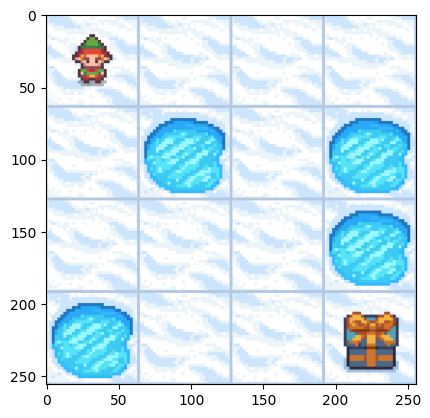

In [2]:
import gym
from matplotlib import pyplot as plt 
%matplotlib inline

# 创建环境
# is_slippery： 控制会不会滑
# map_name： 决定地图尺寸，
# desc：决定地形

env = gym.make( 'FrozenLake-v1',
                render_mode='rgb_array',
                is_slippery=False,
                map_name='4x4',
                desc=['SFFF', 'FHFH', 'FFFH', 'HFFG'])
env.reset()

# 解封装，获得状态转移矩阵
env = env.unwrapped

# 打印游戏
def show():
  plt.imshow(env.render())
  plt.show()
  
show()


In [3]:
#查看冰湖这个游戏的状态列表
#一共4*4=16个状态
#每个状态下都可以执行4个动作
#每个动作执行完，都有概率得到3个结果
#(0.3333333333333333, 0, 0.0, False)这个数据结构表示(概率，下个状态，奖励，是否结束)
len(env.P), env.P[0]

(16,
 {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]})

In [6]:
import numpy as np

# 初始化每个格子的价值
values = np.zeros(16)

# 初始化每个格子下采用动作的概率
pi = np.ones([16, 4]) * 0.25

# 两个算法都是可以的
algorithm = 'policy iter'
algorithm = 'value iter'

values, pi

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]))

In [7]:
# 计算qsa
def get_qsa(state, action):
  value = 0.0
  
  # 每个动作三个不同结果，按概率求和
  for prop, next_state, reward, over in env.P[state][action]:
    
    # 计算下一个状态的分数，取values当中记录的分数
    # gamma = 0.9
    next_value = values[next_state] * 0.9
    
    # 终点/陷阱，则下一个状态为0分
    if over:
      next_value = 0
      
    # 动作的分数就是reward和下一个状态的分数相加
    next_value += reward
    
    # 概率乘积
    next_value *= prop
    
    # 求期望
    value += next_value
  return value

get_qsa(0, 0)

0.0

In [9]:
# 策略评估
def get_values():
  # 初始化新values, 评估所有格子的分数
  new_values = np.zeros([16])
  
  # 遍历所有格子
  for state in range(16):
    
    # 计算当前格子4个动作的分数
    action_value = np.zeros(4)
    
    # 遍历所有动作
    for action in range(4):
      action_value[action] = get_qsa(state, action)
      
    if algorithm == 'policy iter':
      # 每个动作的分数和概率相乘
      action_value *= pi[state]
      # 最后这个格子的分数,等于该格子下所有动作的分数求和(期望)
      new_values[state] = action_value.sum()
      
    if algorithm == 'value iter':
      #求每一个格子的分数，等于该格子下所有动作的最大分数
      new_values[state] = action_value.max()
  
  return new_values

get_values()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
# 策略提升
def get_pi():
  # 重新初始化每个格子下采用动作的概率
  new_pi = np.zeros([16, 4])
  
  # 遍历所有格子
  for state in range(16):
    
    # 当前格子4个动作分别的分数
    action_value = np.zeros(4)
    
    # 遍历所有动作
    for action in range(4):
      action_value[action] = get_qsa(state, action)
      
    # 计算当前state下，达到最大分数的动作有几个
    count = (action_value == action_value.max()).sum()
    
    # 均分概率
    for action in range(4):
      if action_value[action] == action_value.max():
        new_pi[state, action] = 1 / count
      else:
        new_pi[state, action] = 0
        
  return new_pi

get_pi()

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [11]:
# 循环迭代策略评估和策略提升，逼近最优解
for _ in range(10):
  for _ in range(100):
    values = get_values()
  pi = get_pi()
  
values, pi

(array([0.59049, 0.6561 , 0.729  , 0.6561 , 0.6561 , 0.     , 0.81   ,
        0.     , 0.729  , 0.81   , 0.9    , 0.     , 0.     , 0.9    ,
        1.     , 0.     ]),
 array([[0.  , 0.5 , 0.5 , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 1.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.5 , 0.5 , 0.  ],
        [0.  , 1.  , 0.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.  , 0.  , 1.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  ],
        [0.25, 0.25, 0.25, 0.25]]))

In [13]:
# 打印每个格子的策略
def print_pi():
  # 遍历所有格子
  for row in range(4):
    line = ''
    for col in range(4):
      state = row * 4 + col
      if (row == 1 and col == 1) or (row == 1 and col == 3) \
        or (row == 3 and col == 3) or (row == 3 and col == 0):
        line += '○' 
        continue
      if row == 3 and col == 3:
        line += '❤'
        continue
      
      line += '←↓→↑'[pi[state].argmax()]
    print(line)
  
print_pi()

↓→↓←
↓○↓○
→↓↓←
○→→○


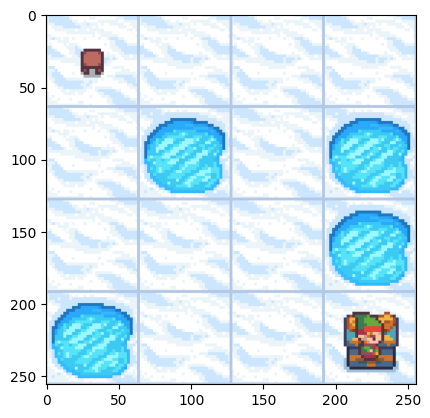

5


In [15]:
from IPython import display
import time

def play():
  env.reset()
  
  index = 0 # 起点
  
  # 最多玩200步骤
  for i in range(200):
    # 选择一个动作
    action = np.random.choice(np.arange(4), size=1, p=pi[index])[0]
    
    # 执行动作
    index, reward, terminated, truncated, _ = env.step(action)
    
    # 打印动画
    display.clear_output(wait=True)
    time.sleep(0.1)
    show()
    
    # 获取当前状态，判断终止
    if terminated or truncated:
      break
  print(i)
  
play()